In [39]:
import pandas as pd
import numpy as np
from plotnine import *
from pyreadr import read_r

- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# Exercício 1
- Faça os exercíıcios de aprendizado LC7.8 – LC7.24 relacionados à amostragem, conforme proposto em [27](https://moderndive.com/7-sampling.html). Verifique suas respostas no apêndice D do mesmo livro.

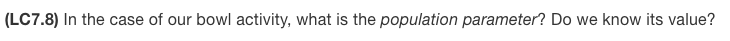

**RESPOSTA:**

O "population parameter" seria a proporção de bolas vermelhas e brancas. Neste problema em específico, este parâmetro é desconhecido porque não se sabe exatamente o número total de bolas brancas e vermelhas. O trabalho aqui era justamente estimar este parâmetro através de amostragem.

---

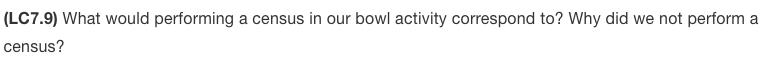

**RESPOSTA:**


Um censo seria o mesmo que contar todas as bolas individualmente, porém isso não foi feito por conta do trabalho extensivo que isso iria requerer, tornando inviável e desnecessário para contexto do experimento.


---

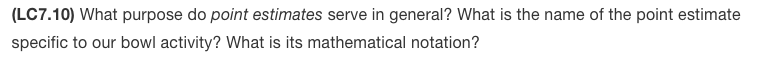

**RESPOSTA:**

Estimativas pontuais servem para estimar parâmetros populacionais de uma dada população. Para este problema em específico, o objetivo era estimar a proporção de bolas vermelhas em relação ao total (brancas + vermlehas). A notação matemática para isso é $\hat{p}$.

---

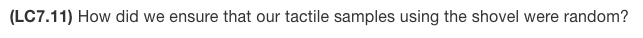

**RESPOSTA:**

A aleatoriedade foi assegurada ao se misturar as bolas.

---

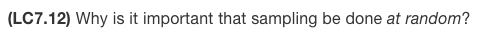

**RESPOSTA:**

É necessário que a mistura seja aleatória para garantir que não existe viés nas amostragens. Se todas as amostras obtidas fossem iguais, o resultado da estimativa populacional não seria bom.

---

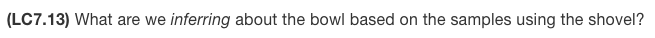

**RESPOSTA:**

A inferência se dá ao inferir que as amostars obtidas representam a população total.

---

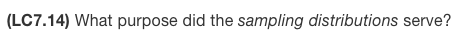

**RESPOSTA:**

A partir das distribuições amostrais, é possível determinar características esperadas das amostras.

---

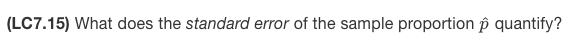

**RESPOSTA:**

O desvio padrão mede a quantidade de variação esperada entre diferentes amostras.

---

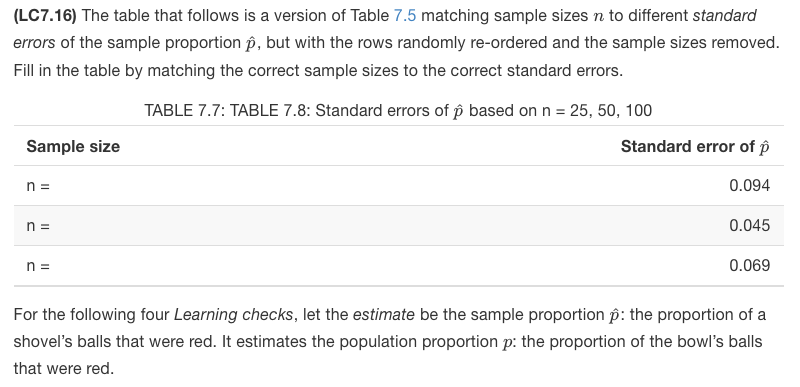

**RESPOSTA:**

Os valores de N devem ser, em ordem:
1. n=25
1. n=100
1. n=50

A lógica utilizada nisso foi que quanto maior a população dentro de uma amostra, menor o desvio padrão.

---

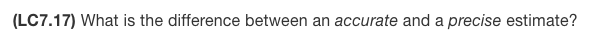

**RESPOSTA:**

Em resumo, uma alta precisão significa que o desvio padrão de uma determinada medida é baixo. Uma acurácia alta implica que a média da população de uma amostra é próxima da média da população completa.

---

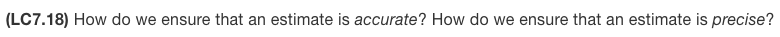

**RESPOSTA:**

Para garantir que uma estimativa é acurada, é necessário estimar os valores dentro de uma faixa considerável, de modo a garantir que o valor real é próximo do obtido através das amostragens.
Para o caso de uma estimativa precisa, é necessário garantir que o valor da amostra completa é próximo dos valores das amostras obtidas, de modo gerar um desvio padrão pequeno.

---

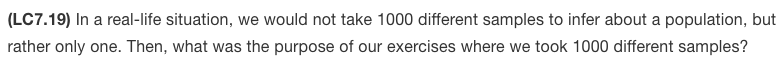

**RESPOSTA:**

O objetivo disso foi deixar a curva de distribuição de probabilidade mais "estreita", com um desvio padrão menor.

---

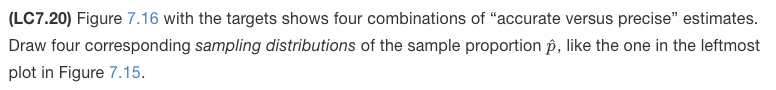

**RESPOSTA:**

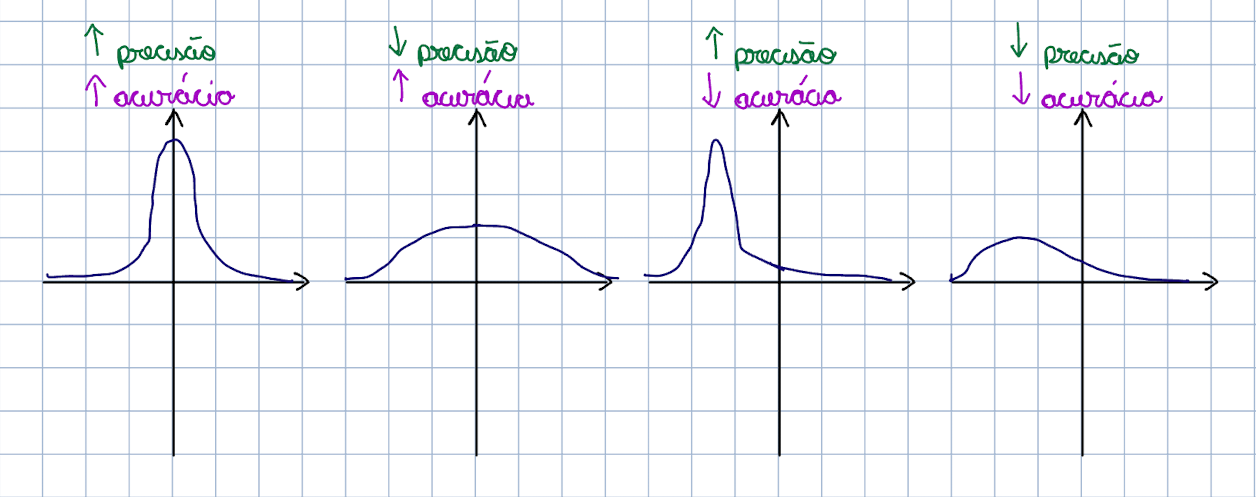

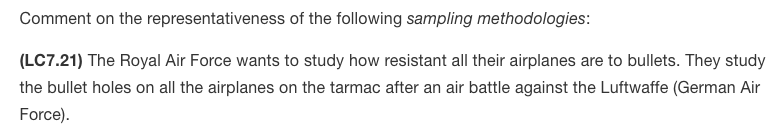

**RESPOSTA:**

Este é um problema bem conhecido. Este espaço amostral não apresenta a representatividade correta porque os aviões que possuem buracos de bala e que RETORNARAM indicam que os danos sofridos em combate não foram fatais. Deste modo, uma boa conclusão tirada disso é que as partes dos aviões que precisam ser reforçadas são as que não apresentaram buracs de bala, visto que se os aviões que retornaram tiveram essa parte intacta, é uma forte evidência de que elas são essenciais.

---

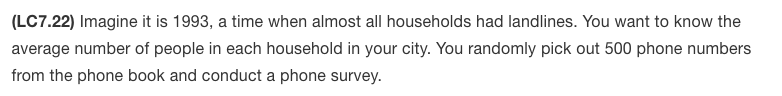

**RESPOSTA:**

Neste caso também existe uma falha na representatividade. O viés aqui está nas casas que tem mais chance de atender o telefone, que são casas com mais pessoas e com adultos.

---

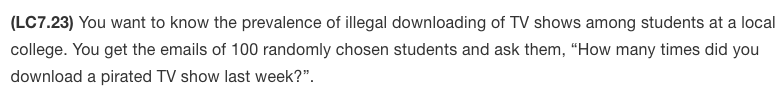

**RESPOSTA:**

Aqui existe um viés quanto à veracidade dos dados. Dificilmente um estudante vai admitir que baixou filmes piratas através de uma comunicação oficial e rastreável (e-mail), visto que isso pode causar problemas para eles.

---

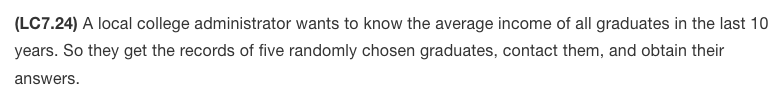

**RESPOSTA:**

Aqui o problema está no tamanho da população amostral. 5 amostras é muito pouco para carregar informações referentes a 10 anos.

---

# Exercício 2
-  Faça os exercícios de aprendizado LC8.1 – LC8.5 relacionados aos intervalos de confiança, conforme proposto em [27](https://moderndive.com/8-confidence-intervals.html). Verifique suas respostas no apêndice D do mesmo livro.

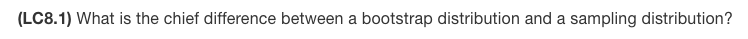

**RESPOSTA:**

Uma distribuição por amostragem se consiste em estimar a distribuição a partir da coleta de diversas amostras, usualmente sem reposição. Já uma distribuição por bootstrap se consiste apenas de uma amostra, em que são coletadas diversas sub-amostras COM REPOSIÇÃO. A grande vantagem disso é que é possível estimar as estatísticas de interesset da população com um conjunto de dados reduzido e sem necessidade de conhecimento da distribuição de dados.

---

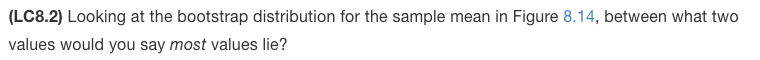

**RESPOSTA:**

A maior parte dos valores estão concentrados entre 1990 e 2000. Antes ou após esses anos, respectivamente, exitem pouquíssimos dados.

---

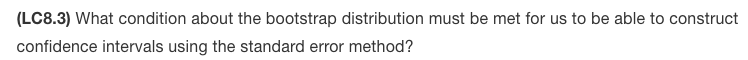

**RESPOSTA:**

A distribuição bootstrap deve apresentar o formato de uma distribuição normal.

---

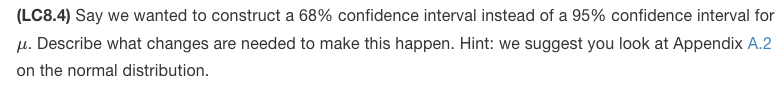

**RESPOSTA**

Basta considerar os dados da distribuição que estão no intervalo entre $ \mu - \sigma$ e $ \mu + \sigma$, em que $\mu$ é a média e $\sigma$ é o desvio padrão.

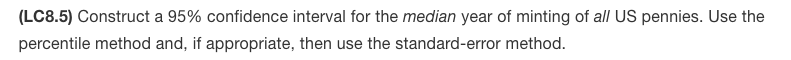

link do dataset: https://github.com/moderndive/moderndive/blob/master/data/pennies_sample.rda

In [40]:
# Lê o arquivo em .rda

pennies_sample = read_r("pennies_sample.rda")
pennies_sample = pd.DataFrame(pennies_sample['pennies_sample'])
pennies_sample.head()

,ID,year
0,1,2002.0
1,2,1986.0
2,3,2017.0
3,4,1988.0
4,5,2008.0


In [41]:
# Seta uma seed para reprodução dos resultados

np.random.seed(42)

# Faz a 1000 amostras de tamanho 50 com reposição

n = 1000
sample_size = 50
sample_medians = []

for i in range(n):
    sample = pennies_sample.sample(n=sample_size, replace=True)
    sample_medians.append(sample['year'].median())

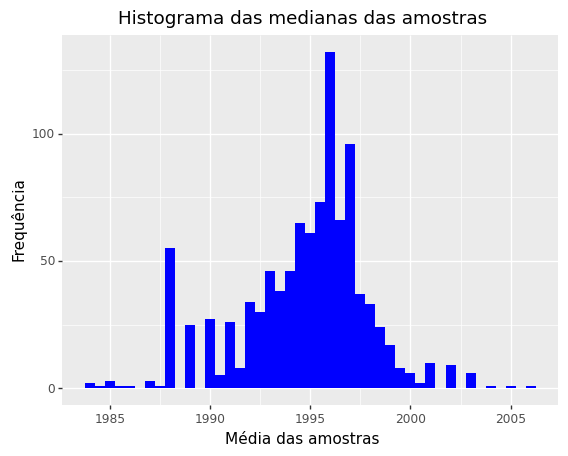

In [42]:
# plota o histograma

plot = (
    ggplot(pd.DataFrame({"sample_medians": sample_medians}), aes(x="sample_medians"))
    + geom_histogram(binwidth=0.5, fill="blue")
    + labs(
        title="Histograma das medianas das amostras",
        x="Média das amostras",
        y="Frequência",
    )
)

print(plot)

In [43]:
# Calcula os percentis 0.05 e 0.95 da distribuição das médias

percentiles = np.percentile(sample_medians, [5, 95])
print(percentiles)

[1988. 1999.]


In [44]:
print(f"Os valores dentro de um intervalo de confiança de 95% são: {percentiles[0]} e {percentiles[1]}")

Os valores dentro de um intervalo de confiança de 95% são: 1988.0 e 1999.0


---

# Exercício 3
- Identifique as pergunta, as estatísticas de teste e as amostras nos exemplos apresentados no Capítulo 8 em [27].

**RESPOSTA:**

O primeiro exemplo apresentado no capítulo foi o ano de cunhagem de moedas circulantes nos EUA. Aqui, a pergunta é qual o ano médio de cunhagem das moedas. Para isto, foi realizada uma amostragem de 1000 moedas, com um bootstraping com sub-amostras de 50 moedas. Aqui, a estatísticas utilizda foi obviamente a média. Também realizou-se uam variação deste experimento de modo a estimar a mediana, conforme exercício anterior.

O segundo experimento apresentado teve a seguinte pergunta: "O bocejo é contagioso?". Para isso, foram coletados dados de 50 pessoas, em entrevistas em que um entrevistador bocejava ou não, de modo a compor um grupo de experimento e outro de controle. Aqui, a estatística utilizada foi a diferença entre pessoas que bocejaram no grupo experimental e no grupo de controle. As amostras foram compostas através da retirada com reposição de um total de 50 pessoas por amostra.

# Exercício 4

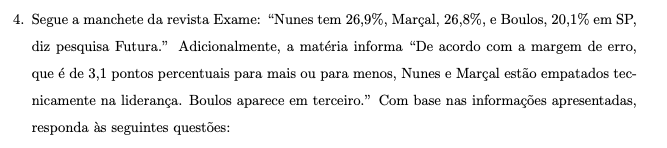

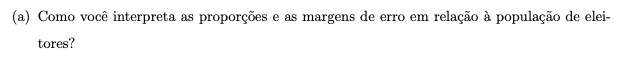

**RESPOSTA:**

As proporções informadas pela reportagem representam uma estimativa das intenções de voto na população dos eleitores. Elas estão sujeitas a uma margem de erro de 3,1 pontos percentuais, mostrando que o resultado final ainda é incerto. Eu acredito que os pontos percentuais correspondam às médias obtidas através do bootstrapping de uma amostra populacional coletada, e que a margem de erro seja referente a um intervalo de confiança não informada na repostagem.

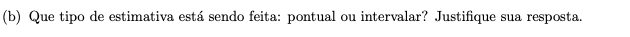

**RESPOSTA:**

Está sendo feita uma estimativa pontual acompanhada de uma estimativa intervalar implícita. A porcentagem associada a cada candidato é a estimativa pontual das intenções de voto. No entanto, a menção da margem de erro sugere a existência de um intervalo de confiança para essas estimativas, o que caracteriza também uma estimativa intervalar, indicando que o verdadeiro valor da intenção de voto está dentro desse intervalo com um determinado nível de confiança.


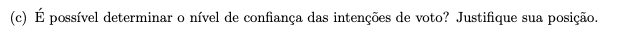

O trecho da reportagem mostrada na questão não fornece informações sobre o intervalo de confiança. Apenas com estes dados é impossível determinar o intervalo de confiança, visto que isso requer conhecimento de uma amostar populacional. Apesar disso, é plausível supor que o intervalo de confiança é de 95%, uma vez que este é o mais utilizado em pesquisas deste tipo.